In [37]:
import csv
import os
from collections import defaultdict
from datetime import datetime
from datetime import timedelta

import matplotlib
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Datos

In [2]:
os.listdir('prestamos_csv')

['PRESTAMOS_EXTERNOS_2015.csv',
 'PRESTAMOS_EXTERNOS_2012.csv',
 'PRESTAMOS_EXTERNOS_2016.csv',
 'PRESTAMOS_EXTERNOS_2013.csv',
 'PRESTAMOS_EXTERNOS_2014.csv']

In [3]:
total_colums = [
    # Ejemplar
    'TITULO', 'AUTOR', 'EDITORIAL', 'SUCURSAL', 'DESC_SUCURSAL', 'COD_BARRAS_LIBRO', 'NUM_TITULO', 'SIG_TOPOGRAFICA',
    'DEWEY', 'II_SUMARIO', 'I_SUMARIO', 'EDICION', 'LOCALIZACION_EJEMPLAR', 'DESC_LOCALIZACION_EJEMPLAR', 'POLITICA',
    'DESC_POLITICA_EJEMPLAR', 'ISBN', 'FECHA_REGISTRO_EJEMPLAR', 'FECHA_ADICION_EJEMPLAR', 'FECHA_PUB',
    'ESTADO_EJEMPLAR', 'PAIS_EJEMPLAR',
    # Usuario (I)
    'OCUPACION', 'NIVEL_EDUCACION', 'AREA_ESTUDIO',
    # Prestamo (I)
    'SUCURSAL_PRESTAMO', 'SUCURSAL_DEVOLUCION',
    # Usuario (II)
    'SUCURSAL_DEL_LECTOR', 'COD_BARRAS_LECTOR', 'CATEGORÍA',
    # Prestamo (II)
    'FECHA_PRESTAMO', 'FECHA_REAL_DEVOLUCION',
]

In [4]:
[(x, total_colums.index(x)) for x in total_colums]

[('TITULO', 0),
 ('AUTOR', 1),
 ('EDITORIAL', 2),
 ('SUCURSAL', 3),
 ('DESC_SUCURSAL', 4),
 ('COD_BARRAS_LIBRO', 5),
 ('NUM_TITULO', 6),
 ('SIG_TOPOGRAFICA', 7),
 ('DEWEY', 8),
 ('II_SUMARIO', 9),
 ('I_SUMARIO', 10),
 ('EDICION', 11),
 ('LOCALIZACION_EJEMPLAR', 12),
 ('DESC_LOCALIZACION_EJEMPLAR', 13),
 ('POLITICA', 14),
 ('DESC_POLITICA_EJEMPLAR', 15),
 ('ISBN', 16),
 ('FECHA_REGISTRO_EJEMPLAR', 17),
 ('FECHA_ADICION_EJEMPLAR', 18),
 ('FECHA_PUB', 19),
 ('ESTADO_EJEMPLAR', 20),
 ('PAIS_EJEMPLAR', 21),
 ('OCUPACION', 22),
 ('NIVEL_EDUCACION', 23),
 ('AREA_ESTUDIO', 24),
 ('SUCURSAL_PRESTAMO', 25),
 ('SUCURSAL_DEVOLUCION', 26),
 ('SUCURSAL_DEL_LECTOR', 27),
 ('COD_BARRAS_LECTOR', 28),
 ('CATEGORÍA', 29),
 ('FECHA_PRESTAMO', 30),
 ('FECHA_REAL_DEVOLUCION', 31)]

In [5]:
%%time

used_colums = [
    # Ejemplar
    'TITULO', 'AUTOR', 'SUCURSAL', 'COD_BARRAS_LIBRO', 'DEWEY', 'DESC_LOCALIZACION_EJEMPLAR',
    'FECHA_PUB','PAIS_EJEMPLAR',
    # Usuario (I)
    'OCUPACION','NIVEL_EDUCACION','AREA_ESTUDIO',
    # Prestamo (I)
    'SUCURSAL_PRESTAMO','SUCURSAL_DEVOLUCION',
    # Usuario (II)
    'SUCURSAL_DEL_LECTOR', 'COD_BARRAS_LECTOR', 'CATEGORÍA',
    # Prestamo (II)
    'FECHA_PRESTAMO','FECHA_REAL_DEVOLUCION'
]

ls = []
for filename in os.listdir('prestamos_csv'):
    df = pd.read_csv('prestamos_csv/' + filename, header=0, usecols=used_colums)
    ls.append(df)
prestamos_df = pd.concat(ls, ignore_index=True)

CPU times: user 16 s, sys: 725 ms, total: 16.7 s
Wall time: 18.5 s


In [6]:
prestamos_df.shape

(3054360, 18)

In [7]:
prestamos_df.head()

,TITULO,AUTOR,SUCURSAL,COD_BARRAS_LIBRO,DEWEY,DESC_LOCALIZACION_EJEMPLAR,FECHA_PUB,PAIS_EJEMPLAR,OCUPACION,NIVEL_EDUCACION,AREA_ESTUDIO,SUCURSAL_PRESTAMO,SUCURSAL_DEVOLUCION,SUCURSAL_DEL_LECTOR,COD_BARRAS_LECTOR,CATEGORÍA,FECHA_PRESTAMO,FECHA_REAL_DEVOLUCION
0,Un bicho extraño /,"Daporta, Mon.",ARM,2298061,863,Infantil,2010,sp,NaN,NaN,NaN,ARM,ARM,ARM,88429527,CTA,22/01/2015,04/02/2015
1,Un bicho extraño /,"Daporta, Mon.",ARM,2298061,863,Infantil,2010,sp,NaN,NaN,NaN,ARM,ARM,ARM,88416381,CTA,31/03/2015,07/04/2015
2,Quisiera tener ... /,"Zoboli, Giovanna.",ARM,2284458,853,Infantil,2010,mx,NaN,NaN,NaN,ARM,ARM,ARM,88381353,CTA,07/11/2015,17/11/2015
3,Johannes Gutenberg /,"Borràs Perelló, Lluís.",ARM,2288922,925,Infantil,2010,sp,Empleado,Técnico,Adm. de empresas,ARM,ARM,ARM,88007424,CEM,16/01/2015,16/01/2015
4,La fantástica leyenda de: la princesa y el dra...,"Alins, Sonia.",ARM,2288896,863,Infantil,2010,sp,NaN,NaN,NaN,ARM,ARM,ARM,88429529,CTA,21/01/2015,28/01/2015


## Datos limpios

In [8]:
prestamos_df = prestamos_df.fillna('')

In [9]:
def remove_slash(x):
    if x['TITULO'].endswith(' /'):
        r = x['TITULO'][:-2]
    else:
        r = x['TITULO']
    return r

prestamos_df['TITULO'] = prestamos_df.apply(remove_slash, axis=1)

In [10]:
def convert_date(x):
    return pd.Series({
            'DATE_PRESTAMO': pd.to_datetime(x['FECHA_PRESTAMO'], format='%d/%m/%Y'),
            'DATE_DEVOLUCION': pd.to_datetime(x['FECHA_REAL_DEVOLUCION'], format='%d/%m/%Y'),
        })

prestamos_df[['DATE_PRESTAMO', 'DATE_DEVOLUCION']] = prestamos_df.apply(convert_date, axis=1)

In [11]:
prestamos_df.head()

,TITULO,AUTOR,SUCURSAL,COD_BARRAS_LIBRO,DEWEY,DESC_LOCALIZACION_EJEMPLAR,FECHA_PUB,PAIS_EJEMPLAR,OCUPACION,NIVEL_EDUCACION,AREA_ESTUDIO,SUCURSAL_PRESTAMO,SUCURSAL_DEVOLUCION,SUCURSAL_DEL_LECTOR,COD_BARRAS_LECTOR,CATEGORÍA,FECHA_PRESTAMO,FECHA_REAL_DEVOLUCION,DATE_PRESTAMO,DATE_DEVOLUCION
0,Un bicho extraño,"Daporta, Mon.",ARM,2298061,863,Infantil,2010,sp,,,,ARM,ARM,ARM,88429527,CTA,22/01/2015,04/02/2015,2015-02-04,2015-01-22
1,Un bicho extraño,"Daporta, Mon.",ARM,2298061,863,Infantil,2010,sp,,,,ARM,ARM,ARM,88416381,CTA,31/03/2015,07/04/2015,2015-04-07,2015-03-31
2,Quisiera tener ...,"Zoboli, Giovanna.",ARM,2284458,853,Infantil,2010,mx,,,,ARM,ARM,ARM,88381353,CTA,07/11/2015,17/11/2015,2015-11-17,2015-11-07
3,Johannes Gutenberg,"Borràs Perelló, Lluís.",ARM,2288922,925,Infantil,2010,sp,Empleado,Técnico,Adm. de empresas,ARM,ARM,ARM,88007424,CEM,16/01/2015,16/01/2015,2015-01-16,2015-01-16
4,La fantástica leyenda de: la princesa y el dragón,"Alins, Sonia.",ARM,2288896,863,Infantil,2010,sp,,,,ARM,ARM,ARM,88429529,CTA,21/01/2015,28/01/2015,2015-01-28,2015-01-21


In [12]:
prestamos_df.to_csv('prestamos_totales.csv', index=False)

In [13]:
%%time

dtypes = {
    'TITULO': str,
    'AUTOR': str,
    'SUCURSAL': str,
    'COD_BARRAS_LIBRO': str,
    'DEWEY': str,
    'DESC_LOCALIZACION_EJEMPLAR': str,
    'FECHA_PUB': str,
    'PAIS_EJEMPLAR': str,
    'OCUPACION': str,
    'NIVEL_EDUCACION': str,
    'AREA_ESTUDIO': str,
    'SUCURSAL_PRESTAMO': str,
    'SUCURSAL_DEVOLUCION': str,
    'SUCURSAL_DEL_LECTOR': str,
    'COD_BARRAS_LECTOR': str,
    'CATEGORÍA': str,
    'FECHA_PRESTAMO': str,
    'FECHA_REAL_DEVOLUCION': str,
    'DATE_PRESTAMO': pd.tslib.Timestamp,
    'DATE_DEVOLUCION': pd.tslib.Timestamp,
}

prestamos_df = pd.read_csv('prestamos_totales.csv', header=0, dtype=dtypes, parse_dates=['DATE_PRESTAMO', 'DATE_DEVOLUCION'])
prestamos_df = prestamos_df.fillna('')

CPU times: user 19 s, sys: 164 ms, total: 19.1 s
Wall time: 19.1 s


In [14]:
prestamos_df.shape

(3054360, 20)

In [15]:
prestamos_df.head()

,TITULO,AUTOR,SUCURSAL,COD_BARRAS_LIBRO,DEWEY,DESC_LOCALIZACION_EJEMPLAR,FECHA_PUB,PAIS_EJEMPLAR,OCUPACION,NIVEL_EDUCACION,AREA_ESTUDIO,SUCURSAL_PRESTAMO,SUCURSAL_DEVOLUCION,SUCURSAL_DEL_LECTOR,COD_BARRAS_LECTOR,CATEGORÍA,FECHA_PRESTAMO,FECHA_REAL_DEVOLUCION,DATE_PRESTAMO,DATE_DEVOLUCION
0,Un bicho extraño,"Daporta, Mon.",ARM,2298061,863,Infantil,2010,sp,,,,ARM,ARM,ARM,88429527,CTA,22/01/2015,04/02/2015,2015-02-04,2015-01-22
1,Un bicho extraño,"Daporta, Mon.",ARM,2298061,863,Infantil,2010,sp,,,,ARM,ARM,ARM,88416381,CTA,31/03/2015,07/04/2015,2015-04-07,2015-03-31
2,Quisiera tener ...,"Zoboli, Giovanna.",ARM,2284458,853,Infantil,2010,mx,,,,ARM,ARM,ARM,88381353,CTA,07/11/2015,17/11/2015,2015-11-17,2015-11-07
3,Johannes Gutenberg,"Borràs Perelló, Lluís.",ARM,2288922,925,Infantil,2010,sp,Empleado,Técnico,Adm. de empresas,ARM,ARM,ARM,88007424,CEM,16/01/2015,16/01/2015,2015-01-16,2015-01-16
4,La fantástica leyenda de: la princesa y el dragón,"Alins, Sonia.",ARM,2288896,863,Infantil,2010,sp,,,,ARM,ARM,ARM,88429529,CTA,21/01/2015,28/01/2015,2015-01-28,2015-01-21


# Visualizaciones

In [38]:
%matplotlib inline
matplotlib.rcParams['figure.max_open_warning'] = 40

### Total préstamos por sucursal

In [47]:
prestamos_df.groupby('SUCURSAL_PRESTAMO')[['TITULO']].count()

,TITULO
SUCURSAL_PRESTAMO,
ARM,30545
BAR,15035
BLAA,1530725
BUC,45170
BUE,6510
CAL,34726
CAR,35157
CASAGO,94056
CATMAN,2088


### Total préstamos por sucursal y fecha

In [116]:
prestamos_sucursal_fecha = prestamos_df.groupby(['SUCURSAL_PRESTAMO', 'DATE_PRESTAMO'])['TITULO'].count()
prestamos_sucursal_fecha = prestamos_sucursal_fecha.unstack(level=0).fillna(0)

In [119]:
prestamos_sucursal_fecha.head()

SUCURSAL_PRESTAMO,ARM,BAR,BLAA,BUC,BUE,CAL,CAR,CASAGO,CATMAN,CUC,...,PER,POP,QUI,RIO,SAN,SIN,STM,TUN,VAL,VIL
DATE_PRESTAMO,,,,,,,,,,,,,,,,,,,,,
2012-01-02,0.0,0.0,42.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-01-03,1.0,0.0,67.0,3.0,0.0,0.0,2.0,3.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,2.0,7.0,2.0,0.0
2012-01-04,0.0,0.0,105.0,2.0,0.0,0.0,2.0,5.0,0.0,1.0,...,4.0,6.0,0.0,1.0,0.0,0.0,4.0,7.0,5.0,1.0
2012-01-05,0.0,0.0,125.0,4.0,0.0,5.0,4.0,17.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,1.0,17.0,5.0,0.0
2012-01-06,0.0,0.0,193.0,14.0,0.0,4.0,3.0,10.0,0.0,1.0,...,9.0,0.0,0.0,0.0,2.0,4.0,1.0,23.0,7.0,2.0


### Ejemplo comparación dos sucursales

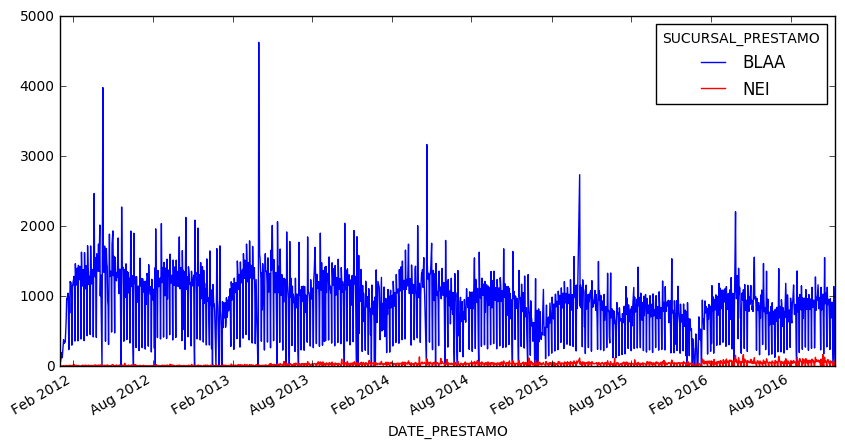

In [120]:
prestamos_sucursal_fecha[['BLAA', 'NEI']].plot(color=['b', 'r'], figsize=(10,5))

### Número total de fechas (de días)

In [71]:
len(prestamos_df.groupby(prestamos_df.DATE_PRESTAMO))

1679

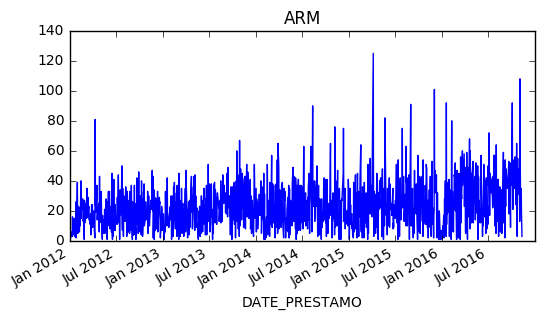

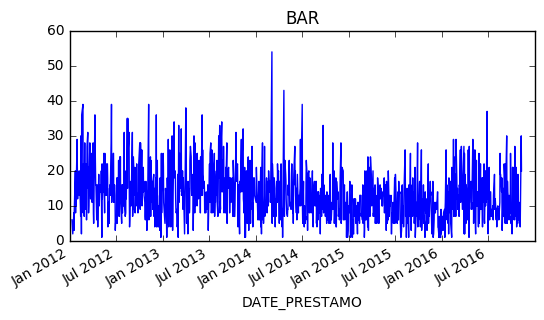

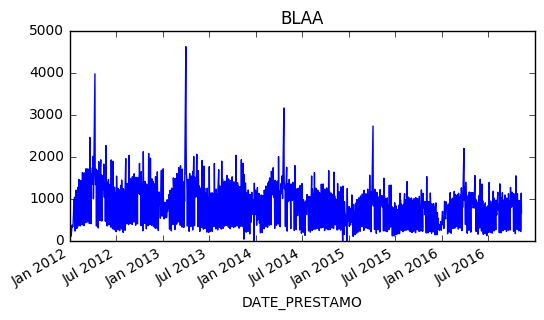

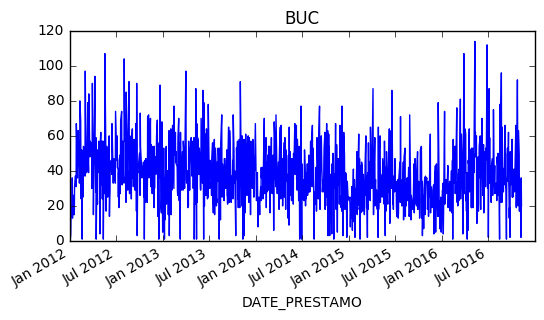

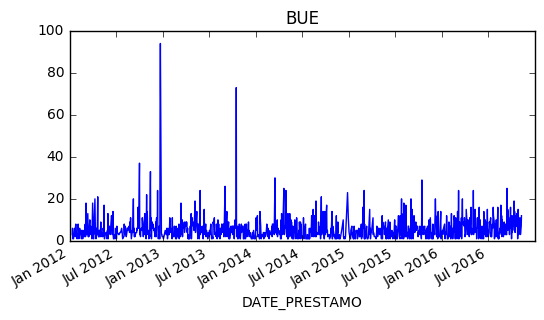

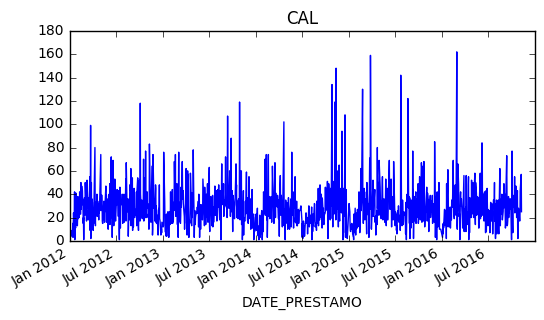

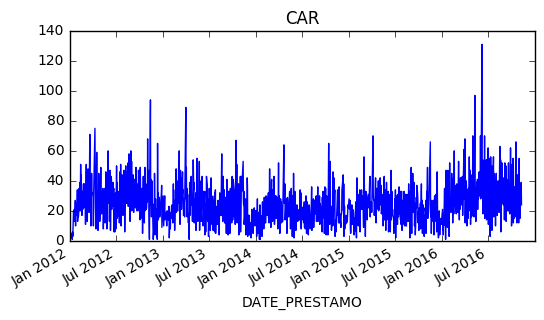

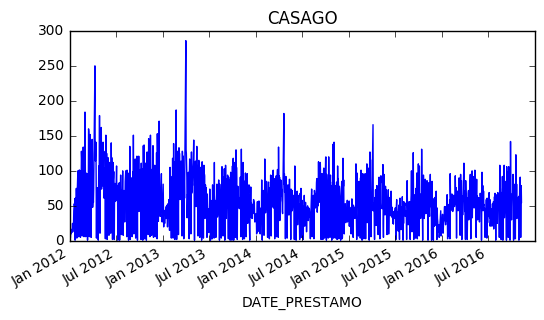

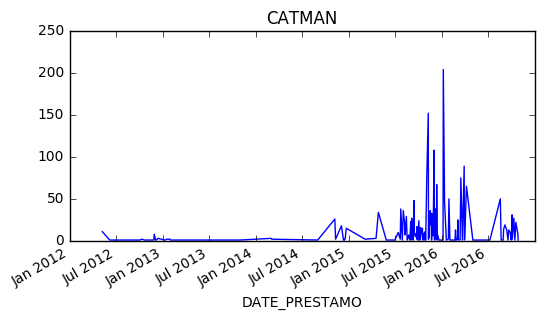

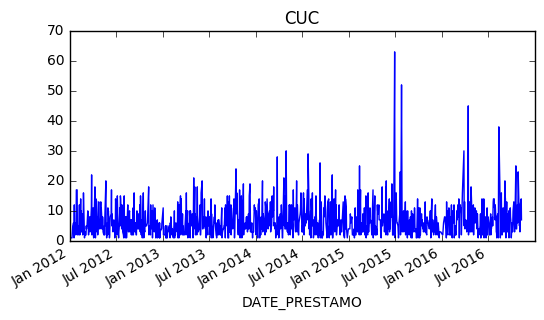

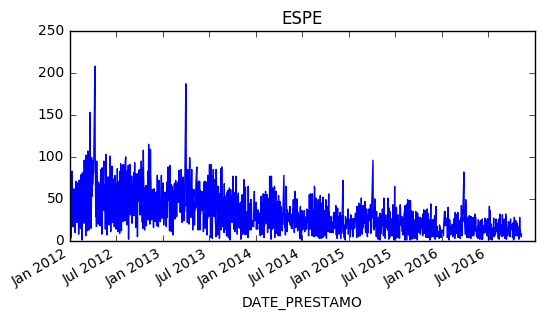

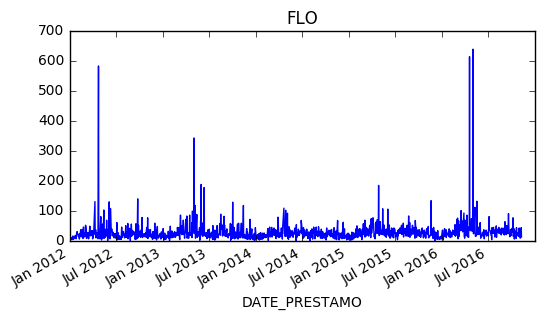

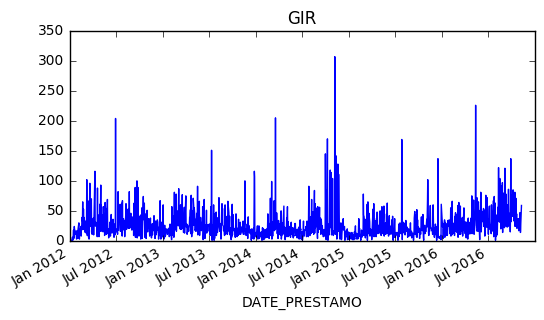

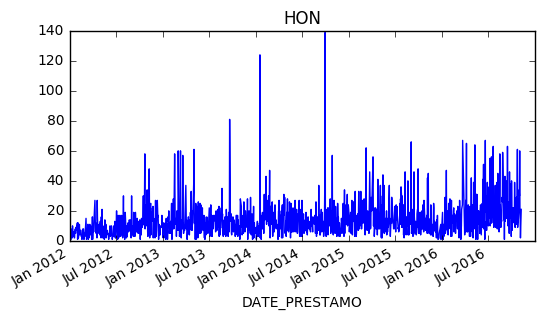

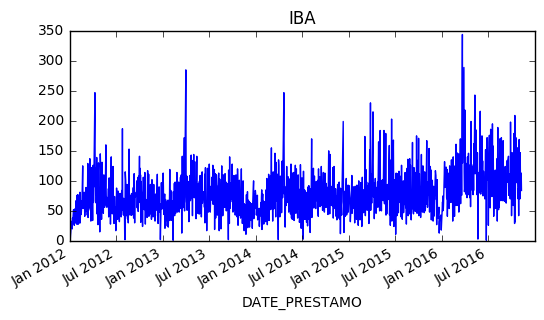

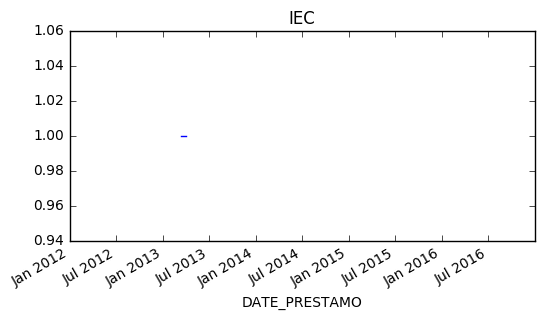

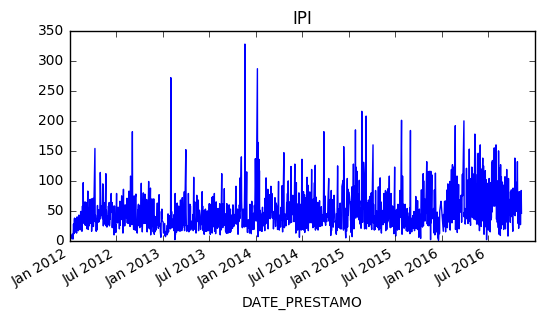

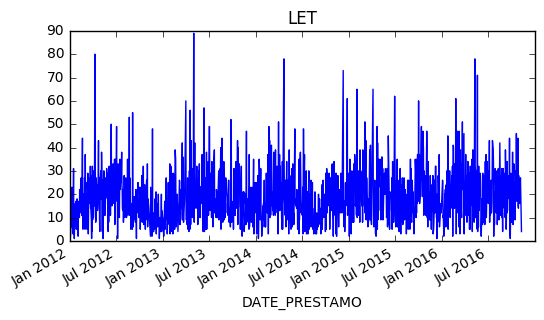

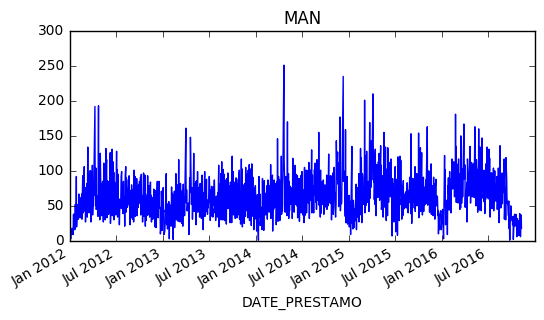

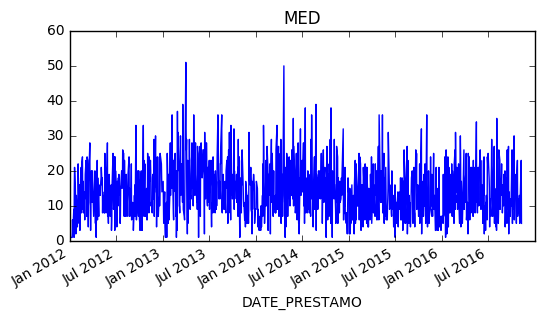

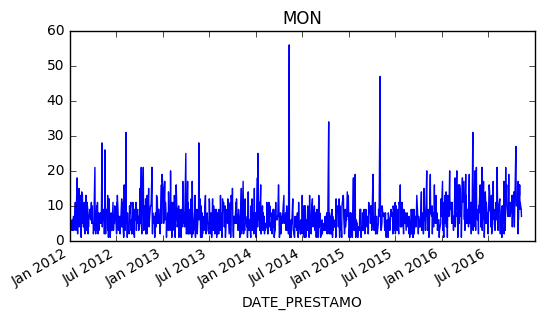

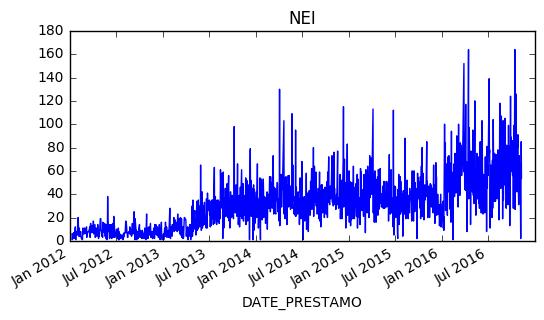

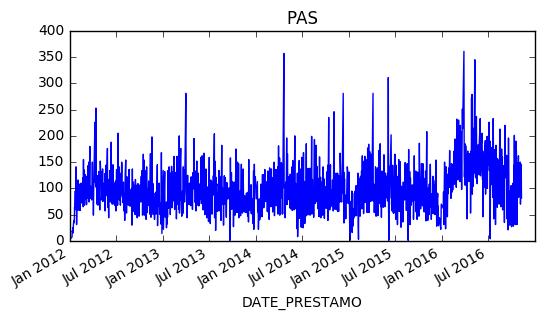

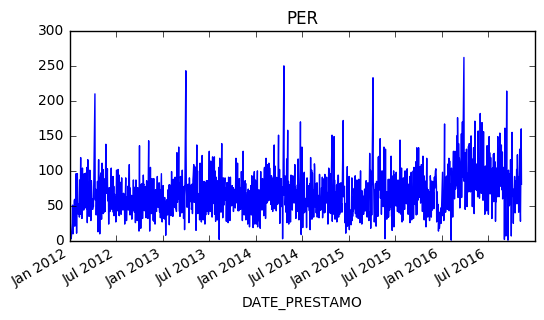

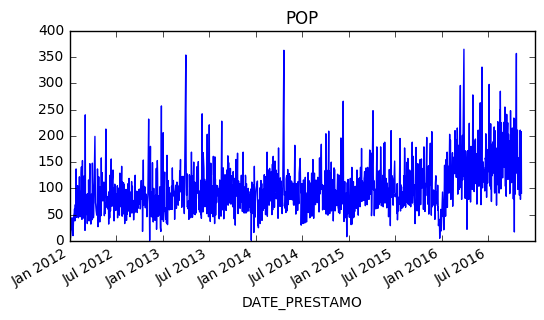

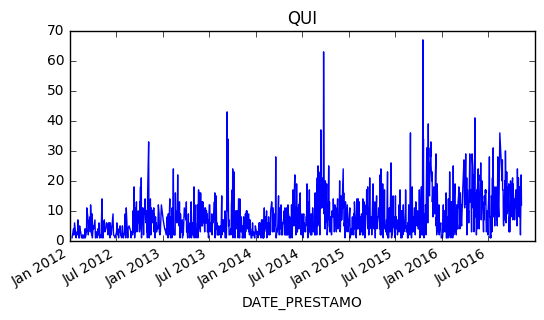

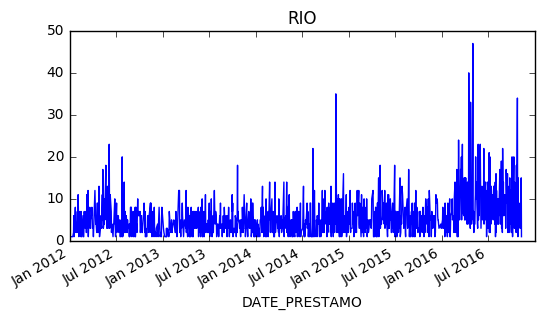

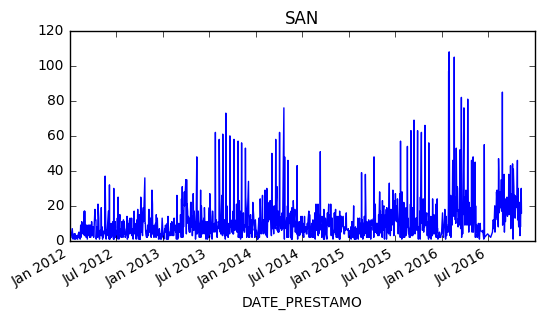

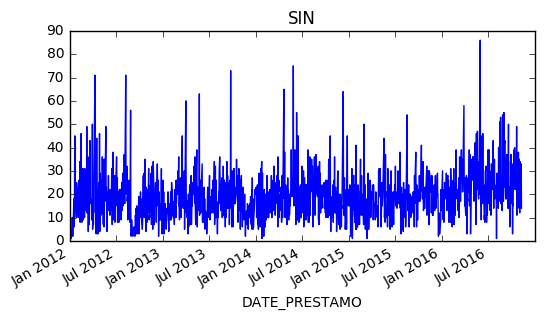

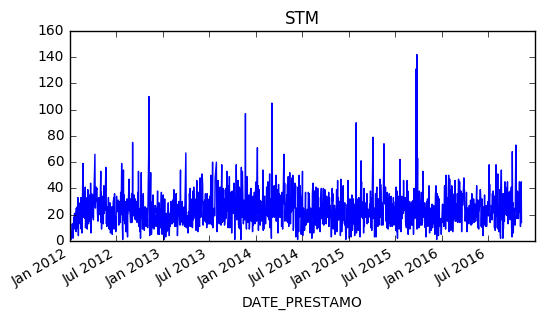

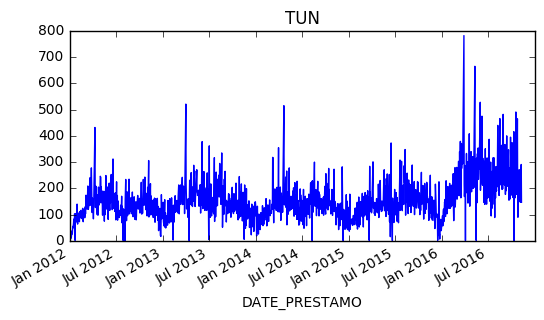

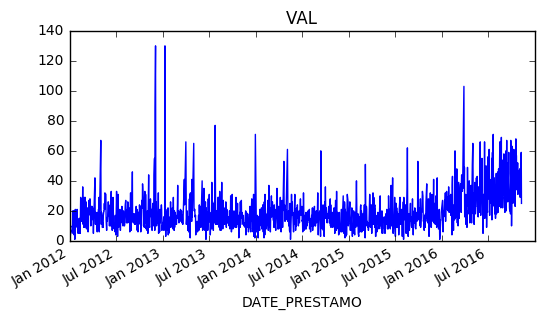

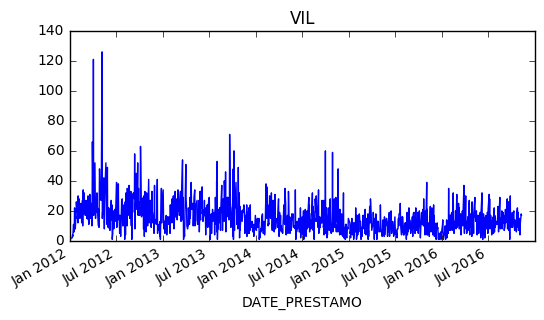

In [123]:
for sucursal, group in prestamos_df.groupby('SUCURSAL_PRESTAMO'):
    plt.figure()
    group.groupby('DATE_PRESTAMO')['TITULO'].count().plot(
        figsize=(6,3),
        xlim=('01-01-2012', '31-12-2016'),
        title=sucursal,
    )

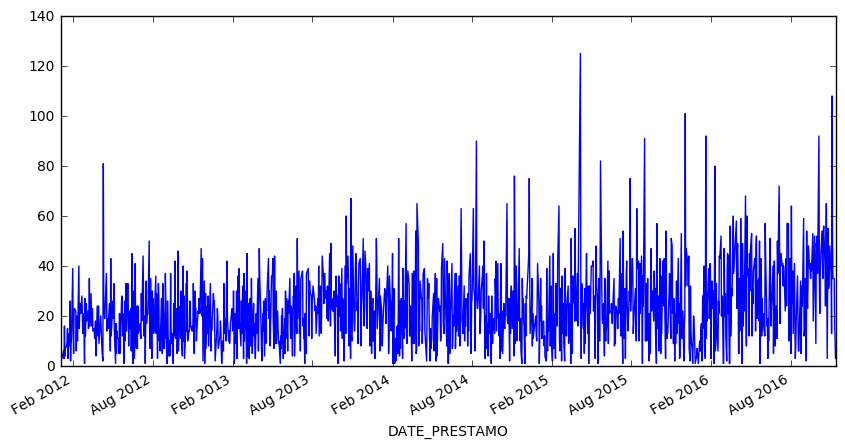

In [25]:
z.groupby('DATE_PRESTAMO')['TITULO'].count().plot(figsize=(10,5))

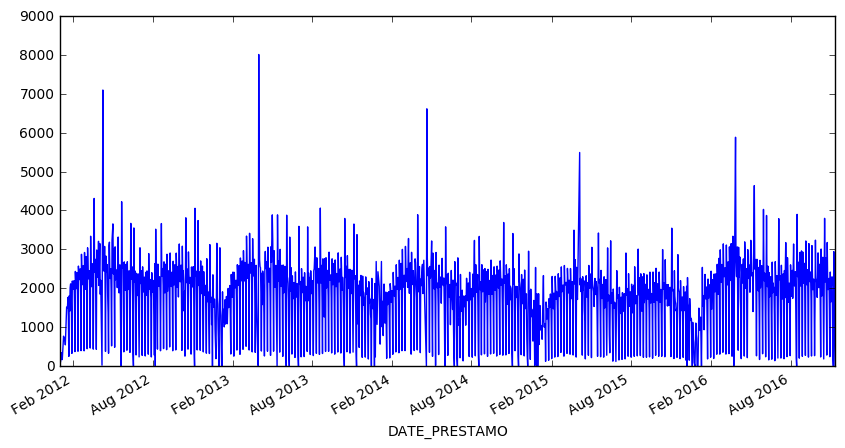

In [17]:
prestamos_df.groupby('DATE_PRESTAMO')['TITULO'].count().plot(figsize=(10,5))

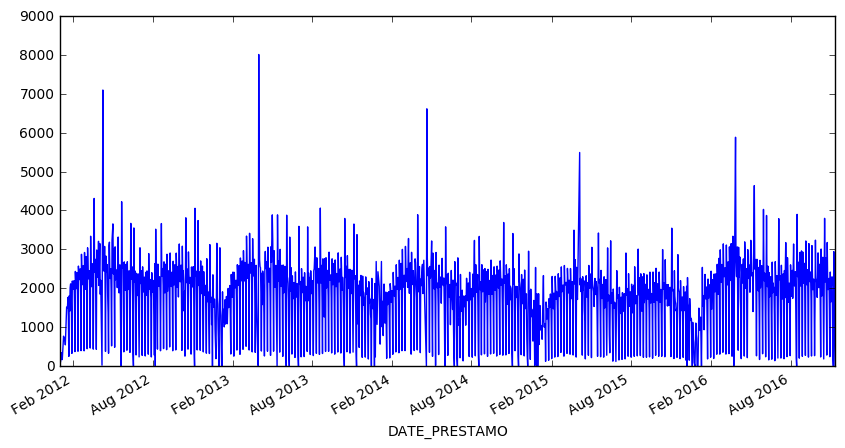

In [13]:
prestamos_df.groupby(prestamos_df.DATE_PRESTAMO)['TITULO'].count().plot(figsize=(10,5))

In [70]:
for x, y in prestamos_df.groupby(prestamos_df.DATE_PRESTAMO)['TITULO']:
    if y.count() == 0:
        print(x)
        print(y.count())
        print()
        break

In [68]:
prestamos_df.groupby(prestamos_df.DATE_PRESTAMO)['TITULO'].count()['2012-04-07']

21

In [59]:
for x, y in prestamos_df.groupby(prestamos_df.DATE_DEVOLUCION)['TITULO']:
    if y.count() > 3500:
        print(x)
        print(y.count())
        print()

2012-04-02 00:00:00
3748

2012-04-04 00:00:00
3664

2012-04-09 00:00:00
4635

2013-04-01 00:00:00
4686

2014-04-21 00:00:00
4283

2015-04-06 00:00:00
3615

2016-03-22 00:00:00
3854

2016-03-28 00:00:00
4081



In [78]:
df = prestamos_df.groupby([prestamos_df.SUCURSAL_PRESTAMO, prestamos_df.DATE_PRESTAMO])['TITULO'].count()

In [83]:
df

SUCURSAL_PRESTAMO  DATE_PRESTAMO
ARM                2012-01-03        1
                   2012-01-10        6
                   2012-01-11        3
                   2012-01-12       16
                   2012-01-13        4
                   2012-01-14        7
                   2012-01-17        8
                   2012-01-18       10
                   2012-01-19       15
                   2012-01-20        3
                   2012-01-21       13
                   2012-01-24        8
                   2012-01-25       26
                   2012-01-26        2
                   2012-01-27        9
                   2012-01-28       11
                   2012-01-31       39
                   2012-02-01       13
                   2012-02-02        5
                   2012-02-03       22
                   2012-02-04       23
                   2012-02-07       22
                   2012-02-08        6
                   2012-02-09       20
                   2012-02-10  

## Fechas

In [2]:
dates = pd.date_range('2012-1-1', '2016-12-31', freq='MS')

In [3]:
dates

DatetimeIndex(['2012-01-01', '2012-02-01', '2012-03-01', '2012-04-01',
               '2012-05-01', '2012-06-01', '2012-07-01', '2012-08-01',
               '2012-09-01', '2012-10-01', '2012-11-01', '2012-12-01',
               '2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01',
               '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01',
               '2013-09-01', '2013-10-01', '2013-11-01', '2013-12-01',
               '2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
               '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
      

In [4]:
# ranges = [(x, y - timedelta(1)) for x, y in zip(dates, dates[1:])]

In [5]:
# ranges

## Sucursales

In [138]:
%%time

sucursales = {}
for filename in os.listdir('prestamos_csv'):
    if filename.endswith('.csv'):
        with open('prestamos_csv/' + filename) as f:
            reader = csv.reader(
                f,
                delimiter=',',
                quotechar='"'
            )
            next(reader)
            for row in reader:
                sucursales[row[3]] = row[4]

CPU times: user 21.3 s, sys: 277 ms, total: 21.5 s
Wall time: 21.5 s


In [139]:
sucursales

{'ARM': 'Armenia',
 'BLAA': 'Luis Angel Arango',
 'BUE': 'Buenaventura',
 'CAL': 'Cali',
 'CAR': 'Cartagena',
 'CASAGO': 'Casa Gómez Campuzano',
 'CATMAN': 'Catalogación y Mantenimiento de Colecciones',
 'CUC': 'Cúcuta',
 'FLO': 'Florencia',
 'GIR': 'Girardot',
 'HON': 'Honda',
 'IBA': 'Ibagué',
 'IEC': 'Investigaciones Económicas',
 'IPI': 'Ipiales',
 'LET': 'Leticia',
 'MAN': 'Manizales',
 'MED': 'Medellín',
 'MON': 'Montería',
 'NEI': 'Neiva',
 'PAS': 'Pasto',
 'PER': 'Pereira',
 'POP': 'Popayán',
 'QUI': 'Quibdó',
 'RIO': 'Riohacha',
 'SAN': 'San Andrés',
 'SIN': 'Sincelejo',
 'STM': 'Santa Marta',
 'TUN': 'Tunja',
 'VAL': 'Valledupar'}

In [ ]:
# %%time

# counter = 0
# d = {}
# sucursales = {}
# for filename in os.listdir('prestamos_csv'):
#     if filename.endswith('.csv'):
#         with open('prestamos_csv/' + filename) as f:
#             reader = csv.reader(
#                 f,
#                 delimiter=',',
#                 quotechar='"'
#             )
#             next(reader)
#             for row in reader:
#                 sucursales[row[3]] = row[4]
                
#                 d[counter] = {
#                     'titulo_l': row[0],
#                     'autor_l': row[1],
#                     'sucursal_loc': row[3],
#                     'cod_barras_l': row[5],
#                     'dewey_l': row[8],
#                     'localizacion_l': row[13],
#                     'isbn_l': row[16],
#                     'ano_pub_l': row[19],
#                     'pais_l': row[21],
#                     'ocupacion_u': row[22],
#                     'nivel_educacion_u': row[23],
#                     'area_estudio_u': row[24],
#                     'sucursal_prestamo_p': row[25],
#                     'sucursal_devolucion_p': row[26],
#                     'sucursal_u': row[27],
#                     'fecha_prestamo_p': row[28],
#                     'fecha_devolucion_p': row[29],
#                 }
#                 counter += 1